instalação de biblioteca de visualização de dados estatísticos  seaborn 
https://seaborn.pydata.org/

In [55]:
!pip install seaborn==0.9.0

instalação de biblioteca de criação e renderização de gráficos graphviz 
https://pypi.org/project/graphviz/

In [56]:
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


pandas = biblioteca para manipulação e análise de dados https://pandas.pydata.org/

Os arquivos deverão ser utilizados em extensão .csv, neste exemplo o arquivo é processado pelo link de um arquivo csv localizado no github

pd.read_csv = comando para leitura de arquivos em csv

nome.head() = visualização das primeiras 5 linhas do dataframe , caso for acrescentado um número dentro dos parênteses é possível reduzir ou aumentar a quantidade de linhas a serem mostradas.

In [57]:
import pandas as pd
link='https://raw.githubusercontent.com/ecfernandes/machinelearning/master/5_decisiontreecars'
cars=pd.read_csv(link)
cars.head()


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Troca de todos os dados com o nome "yes" para o número 1 e todos os dados com o nome "no" para o número 0 da coluna "sold" 

In [58]:
trocar={"yes":1,"no":0}
cars.sold=cars.sold.map(trocar)
cars.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


datetime = biblioteca para manipulação de datas e horários 
https://docs.python.org/3/library/datetime.html

Nova coluna chamada "age" foi criada com o cálculo de "ano_atual" - ( dados da coluna "model_year")

In [59]:
from datetime import datetime
ano_atual=datetime.today().year
cars['age']=ano_atual-cars.model_year
cars.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,age
0,0,21801,2000,30941.02,1,19
1,1,7843,1998,40557.96,1,21
2,2,7109,2006,89627.50,0,13
3,3,26823,2015,95276.14,0,4
4,4,7935,2014,117384.68,1,5


criação de nova coluna "km_per_year" com a multiplicação dos dados da coluna "milhas por ano" vezes o valor de conversão para "km" 

In [60]:
cars['km_per_year']=cars.mileage_per_year*1.60934
cars.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,age,km_per_year
0,0,21801,2000,30941.02,1,19,35085.22134
1,1,7843,1998,40557.96,1,21,12622.05362
2,2,7109,2006,89627.50,0,13,11440.79806
3,3,26823,2015,95276.14,0,4,43167.32682
4,4,7935,2014,117384.68,1,5,12770.11290


algoritmo Counter importado da biblioteca python Collections é utilizado para contar diferentes resultados em uma coluna.  . https://docs.python.org/3/library/collections.html

.drop = algoritmo para elimininação de colunas 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html



In [61]:
from collections import Counter
cars=cars.drop(columns=['Unnamed: 0','mileage_per_year', 'model_year'], axis=1)
cars.head()
Counter(cars['sold'])

Counter({0: 4200, 1: 5800})

In [62]:
cars.head()

,price,sold,age,km_per_year
0,30941.02,1,19,35085.22134
1,40557.96,1,21,12622.05362
2,89627.50,0,13,11440.79806
3,95276.14,0,4,43167.32682
4,117384.68,1,5,12770.11290


Separação das colunas que serão utilizadas para análise e da coluna que será utilizada para previsão

In [0]:
x=cars[['price','age','km_per_year']]
y=cars['sold']

numpy = biblioteca para cálculos em arrays multidimensionais http://www.numpy.org/

train_test_split = algoritmo que permite separar cada grupo de dados em 2 partes, uma para treinamento e outra para teste ( lembrando que as variáveis x e y foram criadas anteriormente no intuito de dividir os dados entre "colunas de características e 1 coluna de resultado para previsão"). Sendo assim, esta algoritmo permite que separe cerca de 70 a 80% das linhas dos dados para treinamento e 20 a 30% das linhas dos dados para testar a acurácia de previsão de resultados com bases nas características apresentadas. Esta divisão é essencial , pois é necessário testar o algoritmo com dados que o algoritmo não teve acesso, ou seja, não treinou. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

SEED np.random.seed(SEED) = impede a aleatoridade da análise dos dados em treinamento e teste . Pode ser utilizado qualquer número para o Seed, mas caso mude o número , os dados serão analisados em uma ordem diferente. https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html

Accuracy_score = algorimo para análise da taxa de acerto da previsão efetuada em relação ao valores corretos https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

LinearSVC  = algoritmo de treinamento em análises de classificações https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html



In [64]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED=5
np.random.seed(SEED)

treinox,testex,treinoy,testey=train_test_split(x,y,test_size=0.25)

print("Treinaremos com %d e testaremos com %d" % ((len(treinox),len(testex))))



Treinaremos com 7500 e testaremos com 2500


modelo.fit(treinox,treinoy) = comando .fit estabelece quais grupos de dados o algoritmo irá treinar

modelo.predict = método para prever qual (quais) o dado(s) correspondente(s) da coluna y em relação a um valor x . Quanto mais dados (característiicas ) forem utilizadas para o treino, maior será a acurácia da resposta prevista pelo método. Atenção que ao digitar o valor dentro dos parênteses deverá ser utilizado duplo colchetes devido a estrutura do array criada anteriormente.

In [65]:
modelo=LinearSVC()
modelo.fit(treinox, treinoy)
previsoes=modelo.predict(testex)
acuracia=accuracy_score(testey,previsoes) *100
print('a acuracia é %.2f%%' % acuracia) 

a acuracia é 59.16%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Dummy Classifier**

DummyClassifier = algoritmo para treinamento de dados de forma simples, pois ele converte todos os dados para 1, pois é um algoritmo que simula como se uma pessoa "chutasse" que todas as respostas serão 1, desta forma é possível comparar  a acurácia de outros algoritmos com a acurácia de um algorimo que usa sempre o mesmo valor de resposta. 

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

Desta forma podemos analisar que o LinearSVC não é um bom algoritmo para estes dados, pois apresentou uma acurácia muito próxima do DummyClassifier

In [66]:

from sklearn.dummy import DummyClassifier

SEED=158020
np.random.seed(SEED)

modelo1=DummyClassifier()
 
modelo1.fit(treinox,treinoy)
previsoes1=modelo1.predict(testex)
acuracia=accuracy_score(testey,previsoes1) *100
print('a acuracia é %.2f%%' % acuracia)

a acuracia é 51.60%


DecisionTreeClassifier = Um algoritmo classificador com árvore de decisão . 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [0]:
from sklearn.tree import DecisionTreeClassifier

RandomForestClassifier = algoritmo de treinamento em análises de classificações https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [68]:
from sklearn.ensemble import RandomForestClassifier

SEED=158020
np.random.seed(SEED)

modelo=RandomForestClassifier()
modelo.fit(treinox, treinoy)
previsoes=modelo.predict(testex)
acuracia=accuracy_score(testey,previsoes) *100
print('a acuracia é %.2f%%' % acuracia) 

a acuracia é 74.36%


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Cross_validate = algoritmo para treinamento em Classificação com Validação Cruzada
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

KFold = algoritmo para divisão de dados de treino e teste em partes iguais , na divisão que desejar
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold



KFold(n_splits = 6 ) = divisão dos dados em 6 partes iguais 

.mean = algoritmo para cálculo de média
.std = algoritmo para cálculo de desvio padrão

Como o cross validation  treina  e testa com todas as possibilidades possíveis dentro das divisões criadas e irá gerar mais de um resultado , é importante criar uma média destes valores ( neste exemplo  6 valores  ) e também seu desvio padrão. Pois de acordo com princípios estatísticos, é considerado que em qualquer conjunto de dados, pelo menos 75% deles fica dentro de uma distância de 2 desvios padrão da média , ou seja, (media - 2*desvio padrão) e (media+2*desvio padrao). Sendo assim, este intervalo é a melhor forma de apresentar a acurácia de uma análise em Cross Validation.

In [70]:


SEED=158020
np.random.seed(SEED)

cv=KFold(n_splits=6)
modelo=DecisionTreeClassifier()
resultados=cross_validate(modelo,x,y,cv=cv,return_train_score=False)
media=resultados['test_score'].mean()
desvio_padrao=resultados['test_score'].std()
print('a acuracia no cross validation é %.2f, %.2f' % ((media -2*desvio_padrao)*100,(media+2*desvio_padrao)*100))
 



a acuracia no cross validation é 70.62, 73.11


max_depth = parâmetro do classificador em árvore de decisão para determinar a quantidade de níveis ao fluxograma de árvores de decisão. Faça o teste alterando este valor para outros números e visualize as diferentes representações gráficas ( com o graphviz ), que poderão deixar a árvore de decisão mais simples e enxuta ,ou mais complexa e precisa à compreensão de como o algoritmo está desenvolvendo as decisões de suas classificações.

In [71]:
 
modelo=DecisionTreeClassifier(max_depth=3)

modelo.fit(treinox,treinoy)
previsoes2=modelo.predict(testex)
acuracia2=accuracy_score(testey,previsoes2) *100
acuracia2



78.75999999999999

export_graphviz = esta função irá gerar um gráfico para a árvore de decisão https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

Para editar o formato, as cores, ou mesmo criar substituições de valores quantitativos para qualitativos é possível criar estas mudanças com os parâmetros desta função. 
Todos estes parâmetros constam na documentação do método.

Neste exemplo foi utilizado arredondamento ao formato dos retângulos, as cores foram alteradas e os valores binários 0 e 1 foram alterados para "no" e "yes" para otimizar a compreensão da árvore de decisão. 

dot_data = retorno para visualização do gráfico.

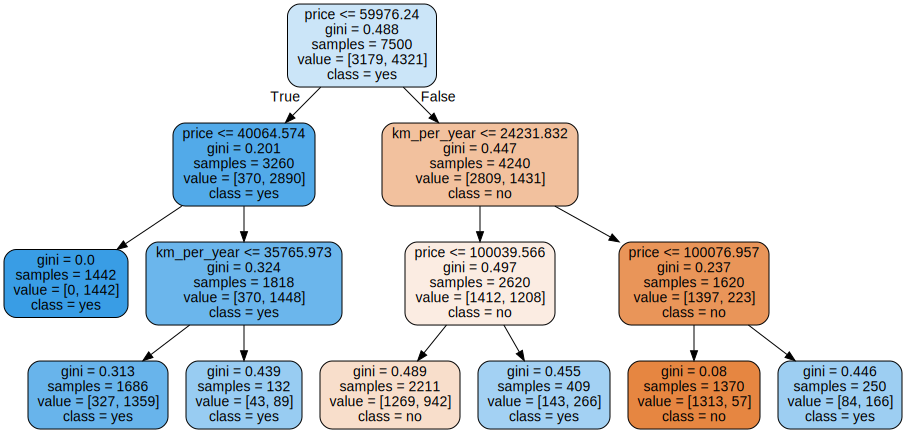

In [72]:
from sklearn.tree import export_graphviz
import graphviz


features=x.columns
dot_data=export_graphviz(modelo,out_file=None,feature_names=features,filled=True,rounded=True,class_names=('no','yes'))
grafico=graphviz.Source(dot_data)
grafico




De forma a analisar qual seria o melhor "max_depth" ou seja o mais preciso para ser utilizado nesta base de dados , um loop for será utilizado para analisar a média dos resultados de treino e teste .
Foi utilizado um Kfold com 10 splits , ou seja, a base de dados foi dividida em 10 partes iguais.
O cross validate foi utilizado para calcular a acurácia de cada uma das possibilidades de treino e teste nestas 10 divisões.

O seed ( aleatoridade dos dados em uma posição fixa) , kfold, DecisionTreeClassifier, cross validate, e o print para visualização da quantidade de max_depth , de média do cross validate ao treino e ao teste foi agrupado em um método de nome arvore_decisao.
Desta forma, um laço "for" foi utilizado para executar este método com valores de max_depth entre 1 e 60. 



In [0]:
def arvore_decisao(max_depth):
  SEED=301
  np.random.seed(SEED)
  
  cv=KFold(n_splits=10)
  modelo=DecisionTreeClassifier(max_depth=max_depth)
  results=cross_validate(modelo,x,y,cv=cv,return_train_score=True)
  #media=results['test_score'].mean()*100
  
  desvio_padrao=results['test_score'].std()
  #print("Acuracia com cross_validation ,  %2f, %2f" % ((media-2*desvio_padrao), (media+2*desvio_padrao)))
  print("max_depth=%d, treino=%.2f, teste=%.2f" % (max_depth, results['train_score'].mean()*100, results['test_score'].mean()*100))
  
  

O resultado apresentado demonstrou que a partir do max_depth = 9 a acurácia de treino começa a se tornar melhor que a acurácia de teste, ou seja, um processo caracterizado como OVERFITTING. A partir do max_depth=53 a acurácia de treino atinge 100% e a de teste mantém-se em 72% . O aprendizado do algoritmo é perfeito aos dados de treino mas tende  a apresentar erros cada vez maiores a dados pelos quais o algoritmo ainda não conhece .

In [74]:
for i in range(1,61):
  arvore_decisao(i)

max_depth=1, treino=75.79, teste=75.78
max_depth=2, treino=75.79, teste=75.78
max_depth=3, treino=78.75, teste=78.67
max_depth=4, treino=78.79, teste=78.56
max_depth=5, treino=78.96, teste=78.58
max_depth=6, treino=79.16, teste=78.25
max_depth=7, treino=79.45, teste=78.23
max_depth=8, treino=79.82, teste=77.96
max_depth=9, treino=80.35, teste=77.43
max_depth=10, treino=81.05, teste=77.05
max_depth=11, treino=81.88, teste=76.72
max_depth=12, treino=82.80, teste=76.35
max_depth=13, treino=83.78, teste=75.68
max_depth=14, treino=84.78, teste=75.47
max_depth=15, treino=85.90, teste=75.18
max_depth=16, treino=87.04, teste=74.42
max_depth=17, treino=88.14, teste=74.76
max_depth=18, treino=89.19, teste=74.46
max_depth=19, treino=90.24, teste=73.97
max_depth=20, treino=91.26, teste=73.69
max_depth=21, treino=92.28, teste=73.06
max_depth=22, treino=93.16, teste=73.08
max_depth=23, treino=93.94, teste=73.18
max_depth=24, treino=94.74, teste=72.78
max_depth=25, treino=95.44, teste=72.60
max_depth